In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df =pd.read_csv('shampoo-sales.csv')

In [3]:
df.columns =['Month','Sales']

In [4]:
df.Month = pd.to_datetime(df.Month)
df.head()

,Month,Sales
0,2018-01-01,266.0
1,2018-01-02,145.9
2,2018-01-03,183.1
3,2018-01-04,119.3
4,2018-01-05,180.3


In [5]:
len(df)

36

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null datetime64[ns]
Sales    36 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 656.0 bytes


In [7]:
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


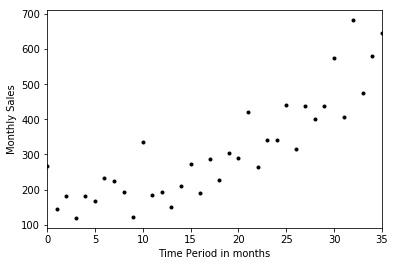

In [8]:
df.Sales.plot(style='k.')
plt.xlabel('Time Period in months')
plt.ylabel('Monthly Sales')
plt.show()

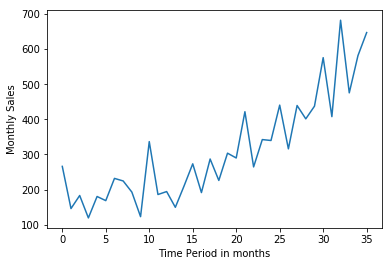

In [9]:
plt.plot(df.Sales)
plt.xlabel('Time Period in months')
plt.ylabel('Monthly Sales')
plt.show()

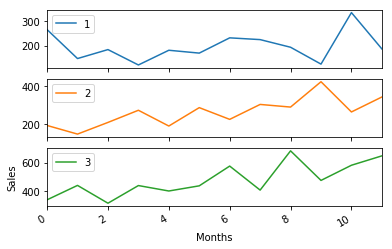

In [10]:
x = df.Sales.groupby(by=df.Month.dt.month)
years =pd.DataFrame()
for i,j in x:
    years[i]=j.values
years.plot(subplots=True,legend=True)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

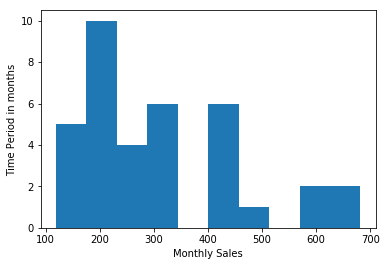

In [11]:
plt.hist(df.Sales)
plt.ylabel('Time Period in months')
plt.xlabel('Monthly Sales')
plt.show()

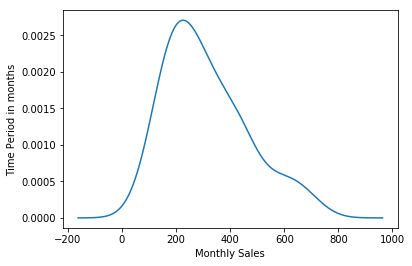

In [12]:
df.Sales.plot(kind='kde')
plt.ylabel('Time Period in months')
plt.xlabel('Monthly Sales')
plt.show()

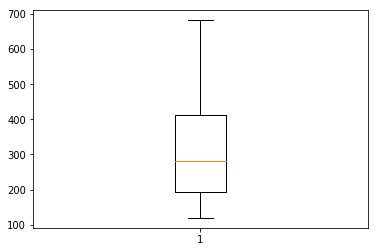

In [13]:
plt.boxplot(df.Sales)
plt.show()

In [14]:
df.Month.dt.month.value_counts()

3    12
2    12
1    12
Name: Month, dtype: int64

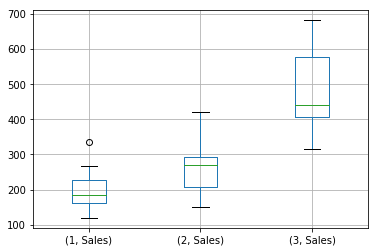

In [15]:
df.groupby(by=df.Month.dt.month).boxplot(df.Sales)
plt.show()

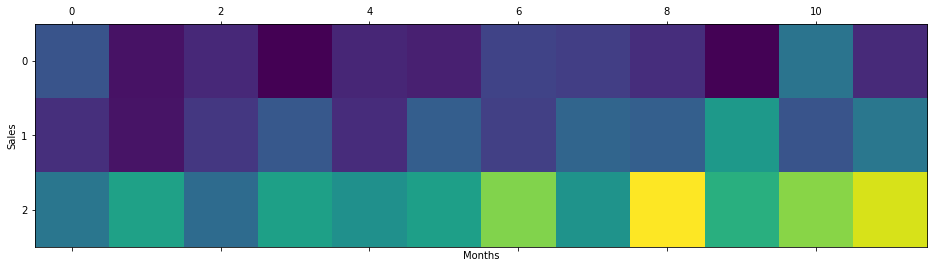

In [16]:
x = df.Sales.groupby(by=df.Month.dt.month)
years =pd.DataFrame()
for i,j in x:
    years[i]=j.values
years=years.T
plt.matshow(years, interpolation=None,aspect='auto')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


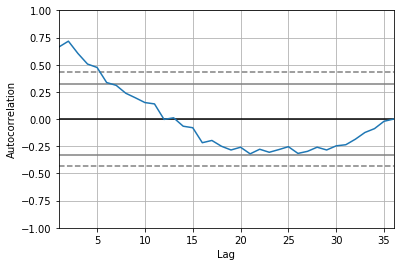

In [17]:
df.Sales = df.Sales.astype(float)
autocorrelation_plot(df.Sales)
plt.show()

### Persistence Forecast Model

In [18]:
def model_persistence(x):
    return x

In [19]:
df1 = pd.read_csv('shampoo-sales.csv',header=0,parse_dates=[0], index_col=0, squeeze=True)
values = pd.DataFrame(df1.values)

In [20]:
dataframe =pd.concat([values.shift(1), values],axis=1)

In [21]:
dataframe.head()

,0,0
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


In [22]:
dataframe.columns =['t-1','t+1']

In [23]:
dataframe.head()

,t-1,t+1
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


In [24]:
X = dataframe.values
train_size = int(len(X)*0.60)
train,test = X[1:train_size],X[train_size:]
x_train,y_train = train[:,0],train[:,1]
x_test,y_test = test[:,0],test[:,1]

In [25]:
prediction=[]
for x in x_test:
    ypred = model_persistence(x)
    prediction.append(ypred)

In [26]:
scores = mean_squared_error(y_test,prediction)

In [27]:
prediction

[289.9,
 421.6,
 264.5,
 342.3,
 339.7,
 440.4,
 315.9,
 439.3,
 401.3,
 437.4,
 575.5,
 407.6,
 682.0,
 475.3,
 581.3]

In [28]:
scores

18168.136

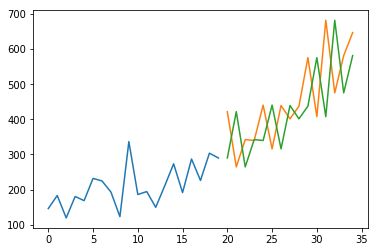

In [29]:
plt.plot(y_train)
plt.plot([None for i in y_train] + [x for x in y_test])
plt.plot([None for i in y_train] + [x for x in prediction])
plt.show()

### Autoregressive Forecast model

In [30]:
df1 = pd.read_csv('shampoo-sales.csv')
X = df1['Sales of shampoo over a three year period'].values

In [31]:
train,test =X[0:len(X)-7],X[len(X)-7:]

In [32]:
model = AR(train)

In [33]:
train[1]

145.9

In [34]:
model_fit= model.fit()

Lag: 9
Coefficients: [-1.08962159e+01 -2.11563096e-01  2.42712980e-01  2.28904198e-01
  7.61694209e-01  3.66296833e-01  1.32395100e-01  3.02361024e-03
 -2.00974536e-01 -1.59122347e-01]
predicted=458.277480, expected=437.400000
predicted=417.809691, expected=575.500000
predicted=502.577733, expected=407.600000
predicted=476.085023, expected=682.000000
predicted=518.617795, expected=475.300000
predicted=516.979465, expected=581.300000
predicted=573.768259, expected=646.900000
Test MSE: 12583.666


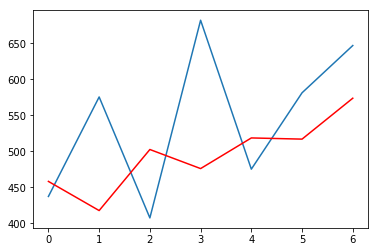

In [35]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### ARIMA Model

In [55]:
ar = pd.read_csv('shampoo-sales.csv',header=0,parse_dates=[0], index_col=0, squeeze=True)

In [56]:
arima_data = ar.values
size = int(len(arima_data) *0.66)
train_arima , test_arima = arima_data[0:size],arima_data[size:len(arima_data)]

In [58]:
history = [ta for ta in train_arima]
predictions1 = list()
for t in range(len(test_arima)):
    model1 = ARIMA(history, order=(5,1,0))
    model1_fit = model1.fit(disp=0)
    output = model1_fit.forecast()
    yhat1 = output[0]
    predictions1.append(yhat1)
    obs = test_arima[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat1, obs))
error1 = mean_squared_error(test_arima, predictions1)
print('Test MSE: %.3f' % error1)

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=349.117623, expected=342.300000
predicted=306.512928, expected=339.700000
predicted=387.376405, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308782, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379487, expected=437.400000
predicted=394.737317, expected=575.500000
predicted=434.915513, expected=407.600000
predicted=507.923355, expected=682.000000
predicted=435.482830, expected=475.300000
predicted=652.743749, expected=581.300000
predicted=546.343527, expected=646.900000
Test MSE: 6958.326
